In [1]:
%matplotlib inline

import gdal

import litho1pt0 as litho

import numpy as np

In [2]:
regionalisation = np.load("Crust1pt0-regionalisation.npz")
regionalisation.keys()

crust_type = regionalisation["latlonDescriptor"]

In [3]:
crust_type.shape

(180, 360)

In [4]:
gridlonv, gridlatv = np.meshgrid(np.linspace(0,360,720), np.linspace(-90,90,360), sparse=False, indexing='xy')

crust_type_i = np.empty_like(gridlonv, dtype=int)

In [5]:
def crust_type_at(regionalisation, lon, lat):
    """
    lon, lat (degrees)
    """  
    # Get lon into appropriate format
    
    lon = lon%360
    
    i = int((lat+90.0)%180)
    j = int(lon)
    
    t = regionalisation[i,j]
    # des = litho.c1_region_descriptor[t]
    
    return t
    

In [6]:
for i in range(0, gridlonv.shape[0]):
    for j in range(0, gridlonv.shape[1]):
        crust_type_i[i,j]= crust_type_at(crust_type, gridlonv[i,j], gridlatv[i,j])

In [7]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as colors


global_extent     = [-180.0, 180.0, -89, 89]

projection1 = ccrs.Orthographic(central_longitude=140.0, central_latitude=0.0, globe=None)
projection2 = ccrs.Mollweide()
projection3 = ccrs.Robinson()

base_projection = ccrs.PlateCarree()

In [8]:
## Background image

import gdal

globaletopo = gdal.Open("/Users/lmoresi/Dropbox/+Research/Publications/MyPapers/CooperMiller-ContinentalStructure/Data/ETOPO1_Ice_g_geotiff.tif")
globaletopo_img   = globaletopo.ReadAsArray()[::30,::30]
del globaletopo

from matplotlib.colors import LightSource, Normalize

cmap=plt.cm.Greys
ls = LightSource(315, 45)
hillshade = ls.shade(globaletopo_img, cmap, vert_exag=0.0005)[1::,1::]

## Drop one point here because the data are 361 x 721 !!

In [9]:
from matplotlib import colors

crust1pt0_clist = [
# Platforms 
    "#6666ff",   
    "#b3b3ff",   
    
# Archean / Proterozoic    
    "#003366", 
    "#003366", 
    "#004d99", 
    "#0066cc", 
    "#0066cc", 
    "#0080ff", 
    "#4da6ff", 

# Arcs
    "#b30000",
    "#e60000",   
    "#ff6666",
    "#ff9999",   

# Extended crust
    "#00cc88",
    "#00cc88",   

# Orogens
    "#ff751a",
    "#ff6600",   
    "#ff8533",
    "#b34700",
    "#ff9933",   
    
# Margin
    "#e6e600",   # <- C. Margin
    "#6666ff",


# Rifted and Extended    
    "#66ff99",   # 3 Rifted / extended

# Phanerozoic
    "#009999",
    "#00e6e6",   
  
# Oceans and plateau
    "#BBBBBB",
    "#BBBBBB",
    "#BBBBBB",
    "#e6e600",  # <-- Shelf
    "#b3b300",  # <-- C. Slope

    
# Other 
    "#BBBBBB",
    "#BBBBBB",
    "#cccca3",   # <- oceanic plateau / continental
    "#BBBBBB",
    "#BBBBBB",
    "#BBBBBB"    # 6 other
]


# map the image with the colors

crust_color_image = np.empty((crust_type_i.shape+(3,)))

for i in range(0,crust_type_i.shape[0]):
    for j in range (0,crust_type_i.shape[1]):
        crust_color_image[i,j] = colors.hex2color(crust1pt0_clist[crust_type_i[i,j]])
        

In [10]:
crust_color_image2 = crust_color_image**0.333 * hillshade[:,:,0:3]

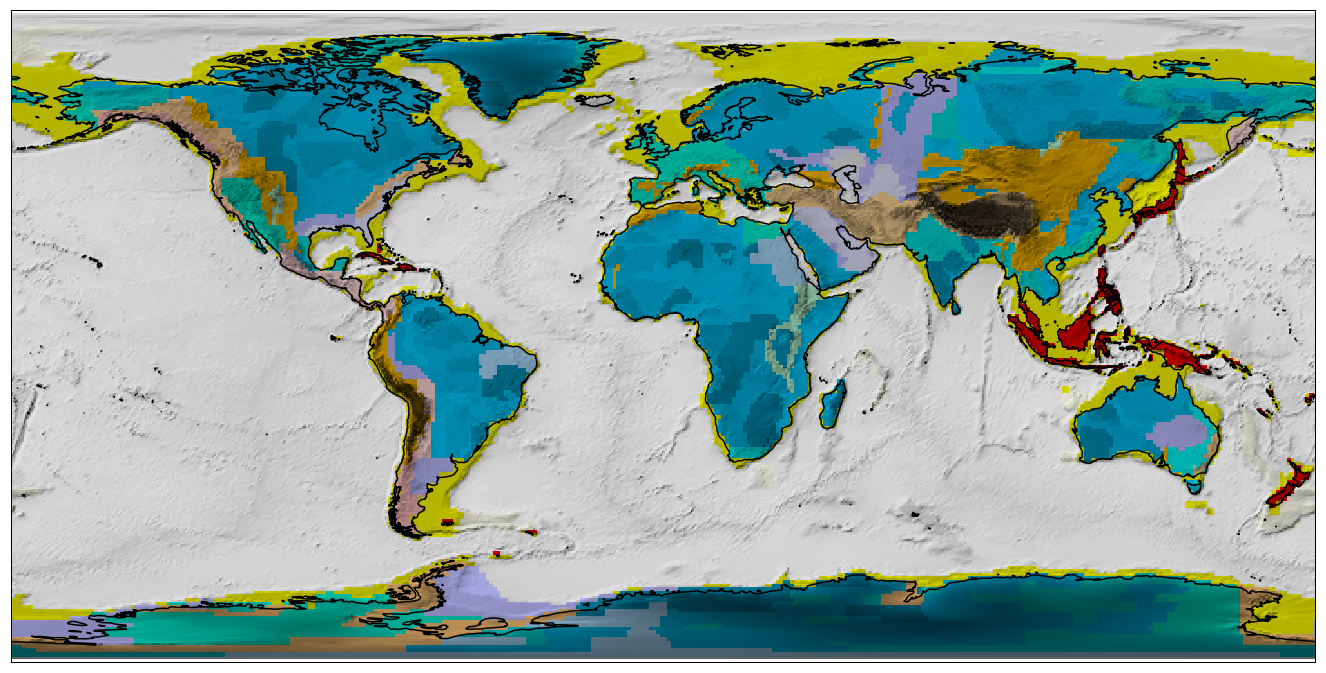

In [11]:
fig = plt.figure(figsize=(24, 12), facecolor="none")
ax  = plt.subplot(111, projection=ccrs.PlateCarree())

# colormap = plt.cm.get_cmap(Crust1pt0, 36)

ax.set_global()

ax.imshow(crust_color_image2, origin='upper', transform=base_projection,
          extent=global_extent, zorder=0)


#ax.add_feature(cartopy.feature.OCEAN, alpha=0.5, zorder=99, facecolor="#BBBBBB")
ax.coastlines(resolution="50m", zorder=100, linewidth=1.5)

# fig.savefig("Crust1.0-Regionalisation.png", dpi=300)

In [12]:
for i, desc in enumerate(litho.c1_region_descriptor):
    print "\t {:2d}: {}".format(i,desc)


	  0: Platform
	  1: Slow, thin Platform
	  2: Archean (Antarctica)
	  3: Early Archean
	  4: Late Archean
	  5: Early/mid  Proter.,
	  6: Early/mid  Proter. (Antarctica, slow)
	  7: Late Proter.
	  8: Slow late Proter.
	  9: Island arc
	 10: Forearc
	 11: Continental arc
	 12: Slow continental arc
	 13: Extended crust
	 14: Fast extended crust (Antarctica)
	 15: Orogen (Antarctica), thick upper, thin lower crust
	 16: Orogen, thick upper crust, very thin lower crust
	 17: Orogen, thick upper crust, fast middle crust
	 18: Orogen with slow lower crust (Andes)
	 19: Slow orogen (Himalaya)
	 20: Margin-continent/shield  transition
	 21: Slow Margin/Shield (Antarctica)
	 22: Rift
	 23: Phanerozoic
	 24: Fast Phanerozoic (E. Australia, S. Africa, N. Siberia)
	 25: Normal oceanic
	 26: Oceans 3 Myrs and younger
	 27: Melt affected o.c. and oceanic plateaus
	 28: Continental shelf
	 29: Continental slope, margin, transition
	 30: Inactive ridge, Alpha Ridge
	 31: Thinned cont. crust, Red Sea

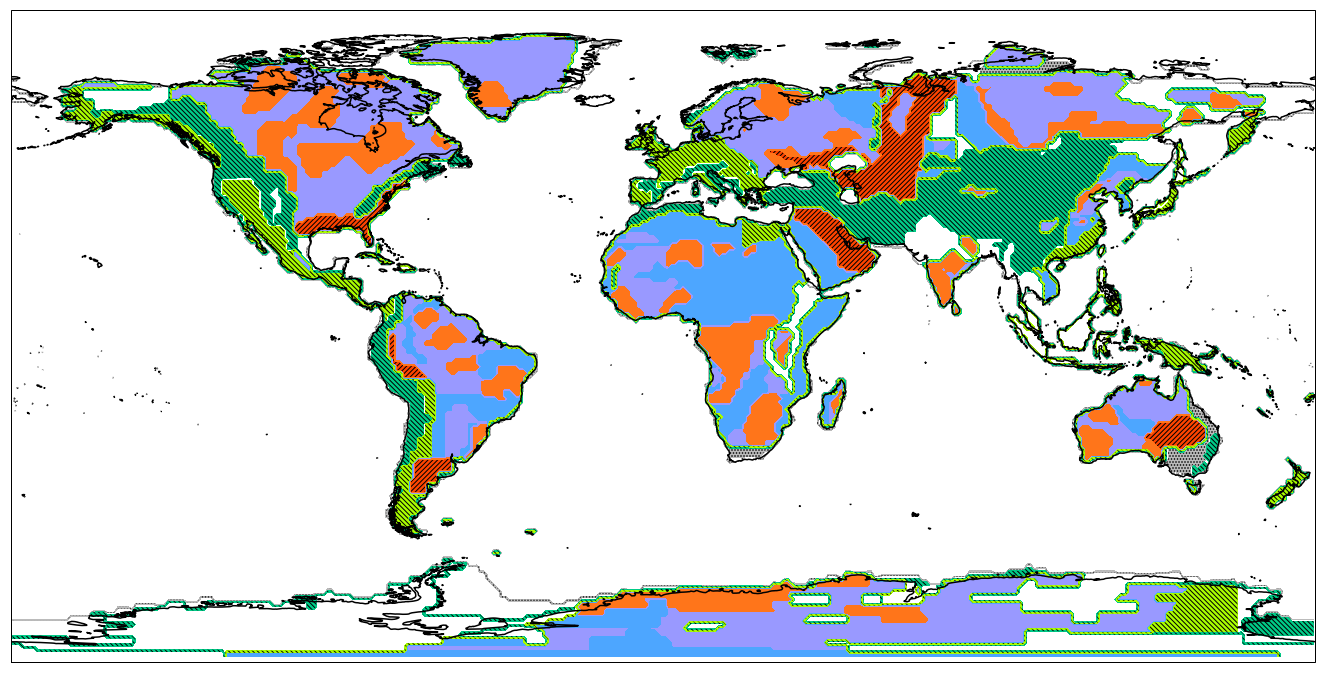

In [13]:
fig = plt.figure(figsize=(24, 12), facecolor="none")
ax  = plt.subplot(111, projection=ccrs.PlateCarree())

# colormap = plt.cm.get_cmap(Crust1pt0, 36)

ax.set_global()

# cmap = plt.get_cmap("Crust1pt0")
# ax.imshow(crust_color_image, origin='upper', transform=base_projection,
#           extent=global_extent, zorder=0, interpolation="lanczos")


# Platforms, Archean, Proterozoic

ax.contourf(crust_type, origin='upper', levels=[0.0, 1.5, 4.5, 6.5, 8.5], 
                colors=[ "#FF4400", "#ff751a", "#9999FF", "#4da6ff"], 
                hatches=["/////", "", "", ""],
                extent=global_extent, transform=base_projection)


# Phanerozoic

ax.contourf(crust_type, origin='upper', levels=[23.0, 24.9], 
                colors=[ "#BBBBBB"], 
                hatches=["....", "", "", ""],
                extent=global_extent, transform=base_projection)


# Orogens

ax.contourf(crust_type, origin='upper', levels=[15.0,20.0], 
                colors=[ "#00cc88", ], 
                hatches=["\\"*5, "", "", ""],
                extent=global_extent, transform=base_projection)

# Arcs

ax.contourf(crust_type, origin='upper', levels=[9.0,13.0], 
                colors=[ "#AAFF00", ], 
                hatches=["\\"*5, "", "", ""],
                extent=global_extent, transform=base_projection)




# cbr = plt.colorbar(mappable=m, orientation='horizontal', shrink=0.5)
# cbr.set_ticks([np.linspace(0.5, 35.5, 37)])
# cbr.ax.set_xticklabels(litho1pt0.c1_region_descriptor,rotation=-90)


#ax.add_feature(cartopy.feature.OCEAN, alpha=0.5, zorder=99, facecolor="#BBBBBB")
ax.coastlines(resolution="50m", zorder=100, linewidth=1.5)

# fig.savefig("Crust1.0-Regionalisation.png", dpi=300)